In [149]:
import pandas as pd
import plotly.express as px

In [17]:
#Reading the dataset and checking the first 5 rows with column headings 
#Adding '_' in column names to access the columns
data = pd.read_csv('RawData.csv')
data.columns = [c.replace(' ', '_') for c in data.columns]
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [18]:
#Confirming if the dataset contains any null values for data clean up
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [15]:
#Comparing the sales from different branches
#Analysis: Branch A - Most Sales, Branch C - Least Sales
fig = px.pie(data, values=data.Branch.value_counts(), names=data['Branch'].unique(), color_discrete_sequence=px.colors.sequential.RdBu, title = "Different Branch Sales")
fig.show()

In [38]:
#Comparision of customer types
#Analysis: Almost same section of audience between member and normal 
fig = px.pie(data, values=data.Customer_type.value_counts(), names=data['Customer_type'].unique(), color_discrete_sequence=px.colors.sequential.Mint, title = "Customer Type")
fig.show()

In [72]:
#Gender grouping analysis of each branch
df = data.groupby(by=["Branch", "Gender"]).size().reset_index(name="counts")
fig = px.bar(df, y='Branch', x='counts', color = 'Gender', barmode = 'group', text = 'Gender')
fig.show()

In [73]:
#Product grouping used amongst different genders
df = data.groupby(by=["Product_line", "Gender"]).size().reset_index(name="counts")
fig = px.bar(df, y='Product_line', x='counts', color = 'Gender', barmode = 'group', text = 'Gender')
fig.show()

Text(0.5, 1.0, 'Product Sales per Hour')

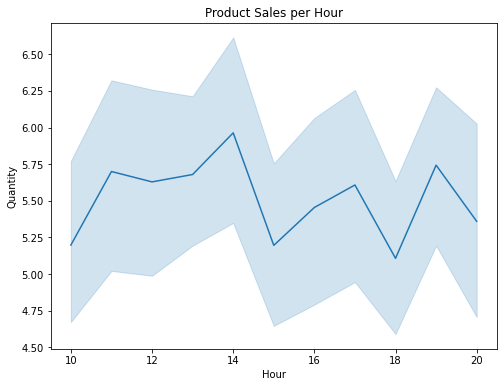

In [223]:
#Sales related Analysis
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
fig = plt.figure(figsize=(8, 6))
sns.lineplot(x="Hour",  y = 'Quantity',data =data).set_title("Product Sales per Hour")

In [187]:
fig = px.box(data, x="Branch", y="Rating", color = 'Customer_type')
fig.show()